## Load libraries and Data

In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [44]:
songs_df = pd.read_csv('genres_v2.csv')

## Look at df

In [45]:
songs_df.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.0134,0.0556,0.389,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.0000,0.1180,0.124,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN


In [46]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [47]:
songs_df['song_name'].nunique() #drop type, id, uri, track_href, analysis_uri, song_name?, 

15439

In [48]:
songs_df['Unnamed: 0'].unique

<bound method Series.unique of 0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
42300    20995.0
42301    20996.0
42302    20997.0
42303    20998.0
42304    20999.0
Name: Unnamed: 0, Length: 42305, dtype: float64>

In [6]:
def MissingUniqueStatistics(df): #from a kaggle EDA tutorial
  
  total_entry_list = []
  total_missing_value_list = []
  missing_value_ratio_list = []
  data_type_list = []
  unique_values_list = []
  number_of_unique_values_list = []
  variable_name_list = []
  
  for col in df.columns:

    variable_name_list.append(col)
    missing_value_ratio = round((df[col].isna().sum()/len(df[col])),4)
    total_entry_list.append(df[col].shape[0] - df[col].isna().sum())
    total_missing_value_list.append(df[col].isna().sum())
    missing_value_ratio_list.append(missing_value_ratio)
    data_type_list.append(df[col].dtype)
    unique_values_list.append(list(df[col].unique()))
    number_of_unique_values_list.append(len(df[col].unique()))

  data_info_df = pd.DataFrame({'Variable':variable_name_list,'#_Total_Entry':total_entry_list,\
                           '#_Missing_Value':total_missing_value_list,'%_Missing_Value':missing_value_ratio_list,\
                           'Data_Type':data_type_list,'Unique_Values':unique_values_list,\
                           '#_Uniques_Values':number_of_unique_values_list})
  
  return data_info_df.sort_values(by="#_Missing_Value",ascending=False)

In [49]:
MissingUniqueStatistics(songs_df)

,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Uniques_Values
21,title,20780,21525,0.5088,object,"[nan, Dirtybird Players, Tech House Movement, ...",133
20,Unnamed: 0,20780,21525,0.5088,float64,"[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...",20781
19,song_name,21519,20786,0.4913,object,"[Mercury: Retrograde, Pathology, Symbiote, Pro...",15440
1,energy,42305,0,0.0000,float64,"[0.8140000000000001, 0.493, 0.893, 0.780999999...",955
18,genre,42305,0,0.0000,object,"[Dark Trap, Underground Rap, Trap Metal, Emo, ...",15
17,time_signature,42305,0,0.0000,int64,"[4, 3, 5, 1]",4
16,duration_ms,42305,0,0.0000,int64,"[124539, 224427, 98821, 123661, 123298, 112511...",26261
15,analysis_url,42305,0,0.0000,object,[https://api.spotify.com/v1/audio-analysis/2Vc...,35877
14,track_href,42305,0,0.0000,object,[https://api.spotify.com/v1/tracks/2Vc6NJ9PW9g...,35877
13,uri,42305,0,0.0000,object,"[spotify:track:2Vc6NJ9PW9gD9q343XFRKx, spotify...",35877


## Wrangle

In [50]:
def wrangle(df):
    # drop columns not in use by nearest-neighbors 
    df.drop(columns=['type', 'id', 'uri', 'track_href', 'analysis_url', 'title', 'Unnamed: 0'], inplace=True)
    # drop unuseful audeio features
    df.drop(columns=['instrumentalness', 'key', 'time_signature'], inplace=True)
    # drop genre, might not work well with nearest-neighbors and does not appear in spotify api request
    df.drop(columns=['genre'], inplace=True)
    
    # making a pool of songs to use as query items
    test_df = df[df['song_name'].isna() == True]
    # dropping rows without song_names, maybe we can keep them if we implement the api calls
    df = df[df['song_name'].isna() == False]
    # drop song-name, not used in nearest-neighbors
    df.drop(columns=['song_name'], inplace=True)
    test_df.drop(columns=['song_name'], inplace=True)
    
    
    return df, test_df

In [51]:
df, test_df = wrangle(songs_df.copy())

In [53]:
df.to_csv('updated.csv', index=False)

In [59]:
MissingUniqueStatistics(df)

,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Uniques_Values
0,danceability,21519,0,0.0,float64,"[0.831, 0.7190000000000001, 0.85, 0.476, 0.797...",824
1,energy,21519,0,0.0,float64,"[0.8140000000000001, 0.493, 0.893, 0.780999999...",893
2,loudness,21519,0,0.0,float64,"[-7.364, -7.23, -4.783, -4.71, -7.667999999999...",8612
3,mode,21519,0,0.0,int64,"[1, 0]",2
4,speechiness,21519,0,0.0,float64,"[0.42, 0.0794, 0.0623, 0.103, 0.293, 0.414, 0....",1369
5,acousticness,21519,0,0.0,float64,"[0.0598, 0.401, 0.0138, 0.0237, 0.217, 0.0452,...",3359
6,liveness,21519,0,0.0,float64,"[0.0556, 0.118, 0.372, 0.114, 0.166, 0.128, 0....",1414
7,valence,21519,0,0.0,float64,"[0.389, 0.124, 0.0391, 0.175, 0.591, 0.109, 0....",1477
8,tempo,21519,0,0.0,float64,"[156.985, 115.08, 218.05, 186.948, 147.988, 14...",12794
9,duration_ms,21519,0,0.0,int64,"[124539, 224427, 98821, 123661, 123298, 112511...",14240


In [10]:
dist_cols = df.columns[:-1]
dist_cols

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [ ]:
# sns.histplot(data=df, x='genre')
# plt.xticks(
#     rotation=45, 
#     horizontalalignment='right',
#     fontweight='light',
#     fontsize='small'  
# )
# plt.show()

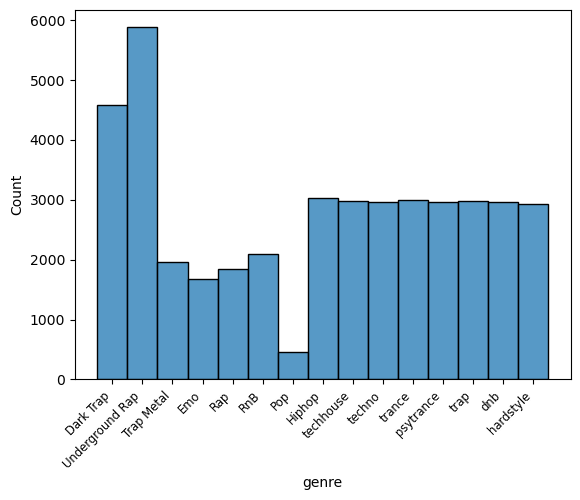

In [62]:
sns.histplot(data=songs_df, x='genre')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)
plt.show()

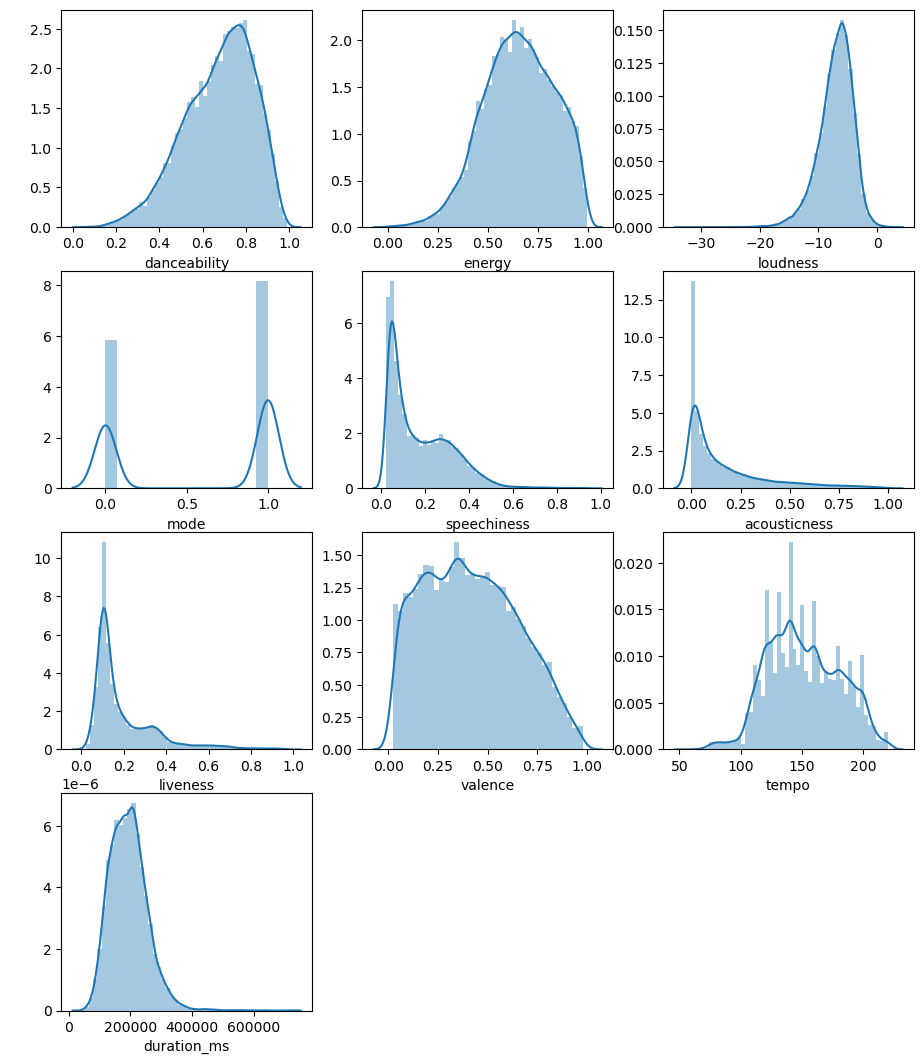

In [127]:
plt.rcParams['figure.figsize'] = [11, 13]
i = 1
for column in df.columns:
    plt.subplot(4,3,i)
    plt.ylabel(' ')
#     plt.figure()
    sns.distplot(df[column])
    i += 1
    
plt.show()
plt.rcParams.update(plt.rcParamsDefault)

## Nearest Neighbors

In [11]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [12]:
# standard scaler removes the mean and scales to unit variance for each feature
scaler = StandardScaler()
scaler.fit(df)
df_s = scaler.transform(df)
df_s[0]

array([ 0.98114234,  0.89205813, -0.11161956,  0.84569973,  1.72013654,
       -0.51563742, -0.92281925, -0.12145624,  0.18891219, -1.15913364])

In [13]:
# Instantiate nearest-neighbors estimator, n_neighbors is Number of neighbors to use by default for kneighbors queries.
neigh = NearestNeighbors(n_neighbors=5)

In [14]:
# fit to our song's audio features
neigh.fit(df)

NearestNeighbors()

In [15]:
# test query, scale with the fitted scaler
test_song = scaler.transform([test_df.iloc[0]])

In [16]:
# query the fitted estimator
similars = neigh.kneighbors(test_song, 5, return_distance=False)

In [17]:
# heres our query song's features
test_df.iloc[0]

danceability         0.714
energy               0.821
loudness            -7.635
mode                 1.000
speechiness          0.176
acousticness         0.041
liveness             0.116
valence              0.649
tempo              191.998
duration_ms     282707.000
Name: 18597, dtype: float64

In [18]:
# here's our query result features
for song in similars:
    print(df.iloc[song])

       danceability  energy  loudness  mode  speechiness  acousticness  \
19532         0.590   0.162    -7.086     1       0.0887        0.9730   
2372          0.743   0.453    -7.194     1       0.5770        0.0599   
18974         0.875   0.482   -14.403     1       0.3790        0.1360   
19748         0.746   0.338   -13.472     0       0.1090        0.6740   
5883          0.399   0.818   -11.361     1       0.4590        0.5420   

       liveness  valence    tempo  duration_ms  
19532    0.1040    0.782  172.639        38333  
2372     0.0307    0.529  138.360        42133  
18974    0.3460    0.660  199.736        48107  
19748    0.5290    0.469  120.053        48423  
5883     0.7400    0.403  109.412        49227  


## Testing out getting audio features from spotify api

In [19]:
import requests
#'ffd61f80a4dd4d7c8fc0c289d994fec0' '4d2e3a2dc89c45be83eaa5083b9b1b48'

CLIENT_ID = 'ffd61f80a4dd4d7c8fc0c289d994fec0'
CLIENT_SECRET = '4d2e3a2dc89c45be83eaa5083b9b1b48'

In [ ]:
# https://open.spotify.com/track/1p80LdxRV74UKvL8gnD7ky?si=3d78aca9e2a64b32
# 31779d48c8d343a9 some bullshit

In [40]:
AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [41]:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

BASE_URL = 'https://api.spotify.com/v1/'

# Track ID from the URI
track_id = '1p80LdxRV74UKvL8gnD7ky'

# actual GET request with proper header
r = requests.get(BASE_URL + 'audio-features/' + track_id, headers=headers)

song_dict = r.json()
song_dict

{'danceability': 0.752,
 'energy': 0.678,
 'key': 5,
 'loudness': -5.421,
 'mode': 1,
 'speechiness': 0.0646,
 'acousticness': 0.085,
 'instrumentalness': 1.64e-06,
 'liveness': 0.13,
 'valence': 0.583,
 'tempo': 96.009,
 'type': 'audio_features',
 'id': '1p80LdxRV74UKvL8gnD7ky',
 'uri': 'spotify:track:1p80LdxRV74UKvL8gnD7ky',
 'track_href': 'https://api.spotify.com/v1/tracks/1p80LdxRV74UKvL8gnD7ky',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1p80LdxRV74UKvL8gnD7ky',
 'duration_ms': 231827,
 'time_signature': 4}

In [23]:
query_nn = np.array([song_dict[x] for x in df.columns])
query_nn

array([ 7.52000e-01,  6.78000e-01, -5.42100e+00,  1.00000e+00,
        6.46000e-02,  8.50000e-02,  1.30000e-01,  5.83000e-01,
        9.60090e+01,  2.31827e+05])

In [42]:
print(df.columns)

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')


In [24]:
api_similars = neigh.kneighbors(scaler.transform([query_nn]), 5, return_distance=False)
api_similars

array([[19531,  2372, 18973, 19742,  5883]])

In [31]:
import pickle

In [37]:
pickle.dump(neigh, open('spotty_model', 'wb'))

In [25]:
query_results = songs_df.loc[api_similars[0]]['uri']

In [26]:
query_results

19531    spotify:track:3QmesrvdbPjwf7i40nht1D
2372     spotify:track:0uhSrMl8tfS1APseIb97CW
18973    spotify:track:4qLmCFNUlFJXOb9TvU9D2L
19742    spotify:track:5YpZh8wfS4moRBk0ijNcXr
5883     spotify:track:0L1RASB4kWt9VDqJxX4yBF
Name: uri, dtype: object

In [27]:
links = query_results.apply(lambda x: 'https://open.spotify.com/track/' + x[14:])

In [30]:
print(links.values[0])

https://open.spotify.com/track/3QmesrvdbPjwf7i40nht1D
